In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


TensorFlow 2.x selected.


In [2]:
from keras.datasets import cifar100
(train_img, train_label), (test_img, test_label) = cifar100.load_data(label_mode='fine')
train = train_img[0:49,:,:,:]
test = test_img[0:49,:,:,:]
train_labels = train_label[0:49,:]
test_labels = test_label[0:49,:]
# Normalize pixel values to be between 0 and 1
train, test = train / 255.0, test / 255.0

Using TensorFlow backend.


169009152/169001437 [==============================] - 2s 0us/step


In [0]:
import numpy as np
test_images=np.ones((49,224,224,3))
train_images=np.ones((49,224,224,3))
for i in range(49):    
    train_images[i,:,:,:] = pad_img = np.pad(train[i,:,:,:], ((96, 96),(96, 96), (0, 0)), mode='constant', constant_values=0)
    test_images[i,:,:,:] = pad_img = np.pad(test[i,:,:,:], ((96, 96),(96, 96), (0, 0)), mode='constant', constant_values=0)

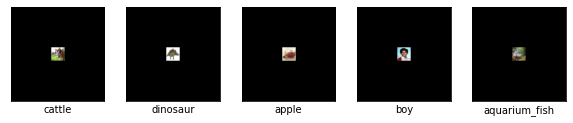

In [4]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(96, (11, 11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(100))


In [22]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 256)      

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Train on 49 samples, validate on 49 samples
Epoch 1/5
49/49 [==============================] - 5s 102ms/sample - loss: 3.7113 - accuracy: 0.0408 - val_loss: 7.0506 - val_accuracy: 0.0204
Epoch 2/5
49/49 [==============================] - 4s 91ms/sample - loss: 3.6014 - accuracy: 0.0612 - val_loss: 6.2554 - val_accuracy: 0.0204
Epoch 3/5
49/49 [==============================] - 4s 90ms/sample - loss: 3.5970 - accuracy: 0.0612 - val_loss: 6.2877 - val_accuracy: 0.0204
Epoch 4/5
49/49 [==============================] - 4s 90ms/sample - loss: 3.6022 - accuracy: 0.0204 - val_loss: 6.6963 - val_accuracy: 0.0408
Epoch 5/5
49/49 [==============================] - 4s 90ms/sample - loss: 3.5941 - accuracy: 0.0408 - val_loss: 7.1015 - val_accuracy: 0.0204


49/49 - 1s - loss: 7.1015 - accuracy: 0.0204


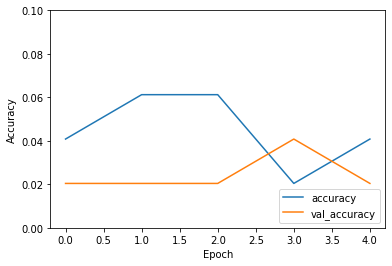

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [30]:
print(test_acc)

0.020408163
